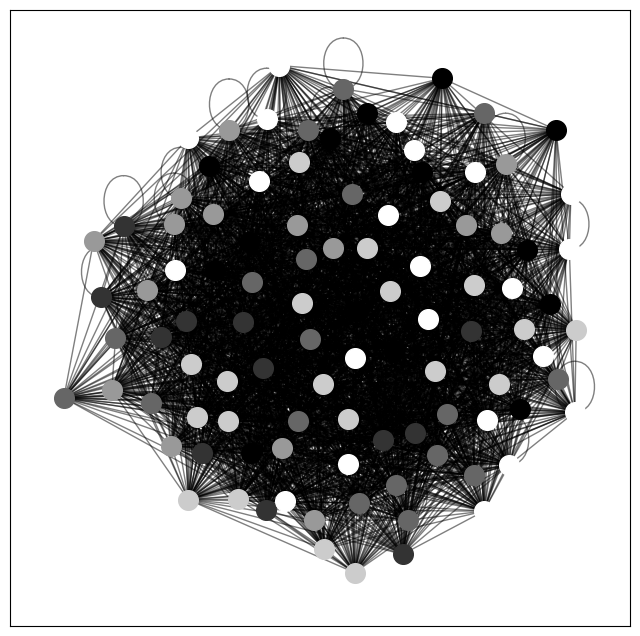

In [9]:
import pickle
import os
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt

# 创建一个示例网络
G = nx.Graph()
# 添加边，模拟社交联系
with open(os.getcwd() + "/../Data Preprocessor/Data/edges.pkl", "rb") as fin:
    edges = pickle.load(fin)
G.add_edges_from(edges)

# 使用Louvain方法进行社区发现
partition = community_louvain.best_partition(G)

# 绘制网络图和社区
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 8))
# 绘制节点
for community in set(partition.values()):
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == community]
    nx.draw_networkx_nodes(
        G,
        pos,
        list_nodes,
        node_size=200,
        node_color=str(community / max(partition.values())),
    )

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


community_list = dict()
for node, community in partition.items():
    cm = community_list.get(community, [])
    cm.append(node)
    community_list[community] = cm

In [13]:
# 根据社区情况，如成员数分配资源
maxNum = -1
maxIdx = -1
for idx, nodes in community_list.items():
    print(f"Community {idx} has {len(nodes)} people")
    if len(nodes) > maxNum:
        maxIdx = idx
        maxNum = len(nodes)

print(f"{maxIdx}社区所需要的资源最多，\n他们的成员是{community_list[maxIdx]}")

Community 5 has 22 people
Community 3 has 15 people
Community 2 has 18 people
Community 4 has 20 people
Community 0 has 14 people
Community 1 has 12 people
5社区所需要的资源最多，
他们的成员是['Uonwl Rrwdxxxm', 'Bjduhjek Zrrbae', 'Yyotzdxu Ztgltbhud', 'Vtboz Rdnxghznj', 'Hrphaxxi Xiboje', 'Ohjsqu Jlbnogqod', 'Qmfgifo Wsssoslfc', 'Jqdwk Hpqamw', 'Mcgzwqolp Ddaar', 'Nuzys Dmwdpvb', 'Trpftds Cbahrf', 'Zqeaoorgq Nxauogrie', 'Zuiyqry Aeuhlyimu', 'Znlqbtmh Bglioh', 'Gicwj Srdblcjea', 'Kcujdo Jngjnzcol', 'Avbpirxdx Ytoegkan', 'Gubatfro Hjxzv', 'Yhebie Ibyeftuzs', 'Alxzzosl Xictkwug', 'Wbjcbyjwh Qwxhfxfv', 'Jbdkbb Xajdczd']
